In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [2]:
def plot_columns(df, columns, ylim=None, logaxis=False):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
history = 'history/training_history.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,Total Iterations,D/latent_real,D/latent_fake,D/latent_reg,D/ref_real,D/ref_fake,D/ref_reg,G/latent_adv,...,G/ref_adv,G/ref_dom,G/ref_trts,G/ref_cyc,G/ref_id,G/ref_sty,G/ref_ds,G/lambda_ds,G/lambda_dom,G/lambda_trts
0,0:01:06,100,100000,0.014554,0.030996,0.005930,0.001974,0.014610,0.006223,0.630880,...,0.439276,466.074921,190.783493,0.290124,0.206269,2.484740,0.000345,0.0,0.0,0.0
1,0:01:44,200,100000,0.013620,0.044431,0.006471,0.000939,0.015544,0.004856,1.260705,...,0.442091,55.968422,66.793175,0.125661,0.086043,0.693111,0.000208,0.0,0.0,0.0
2,0:02:21,300,100000,0.066523,0.009590,0.035978,0.005005,0.100942,0.006489,0.612328,...,0.482236,61.189575,55.795155,0.082608,0.064856,0.565674,0.000207,0.0,0.0,0.0
3,0:02:57,400,100000,0.105603,0.003895,0.102409,0.009810,0.045662,0.016066,0.519936,...,0.283337,79.166092,22.932446,0.055685,0.044978,0.322544,0.000099,0.0,0.0,0.0
4,0:03:34,500,100000,0.059046,0.003570,0.041470,0.002712,0.013550,0.010424,0.653782,...,0.421903,32.624973,28.737854,0.050301,0.050047,0.506332,0.000058,0.0,0.0,0.0


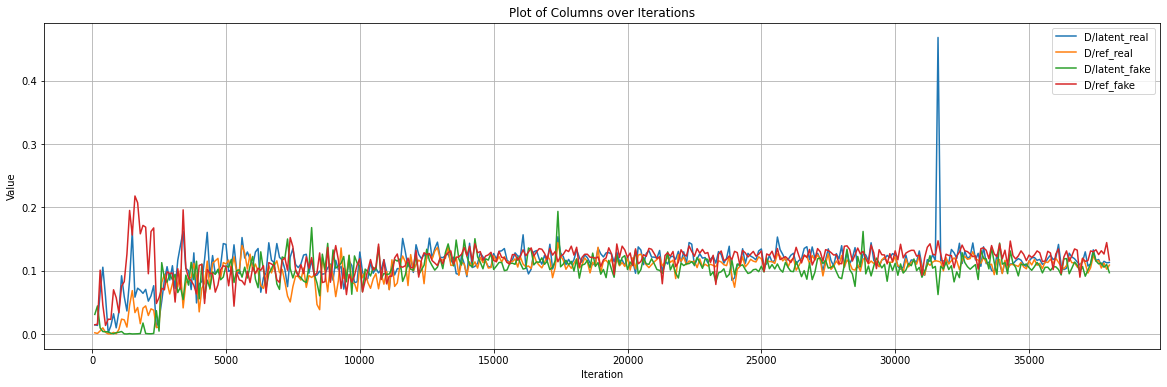

In [4]:
plot_columns(history, ['D/latent_real', 'D/ref_real', 'D/latent_fake', 'D/ref_fake'], logaxis=False)

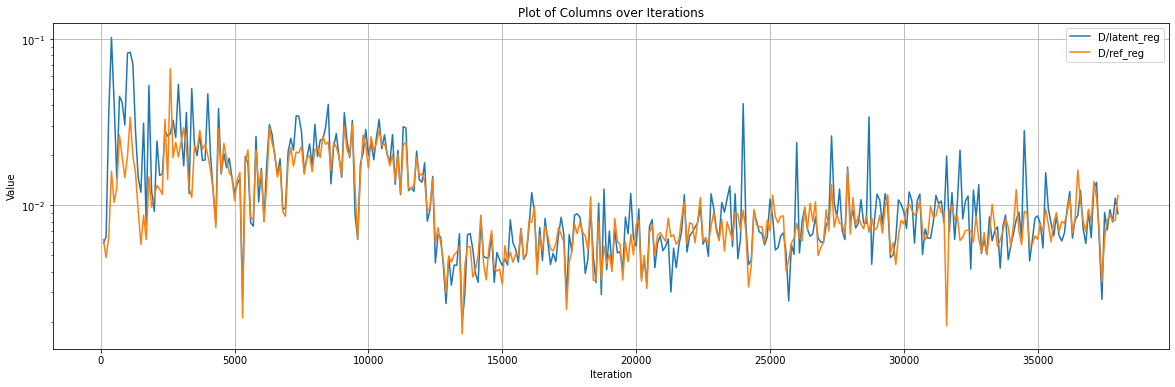

In [5]:
plot_columns(history, ['D/latent_reg', 'D/ref_reg'], logaxis=True)

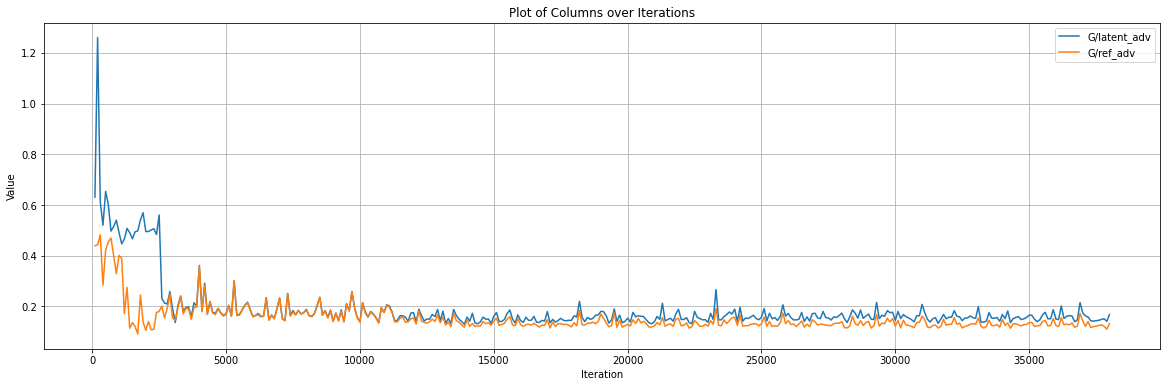

In [6]:
plot_columns(history, ['G/latent_adv', 'G/ref_adv'], logaxis=False)

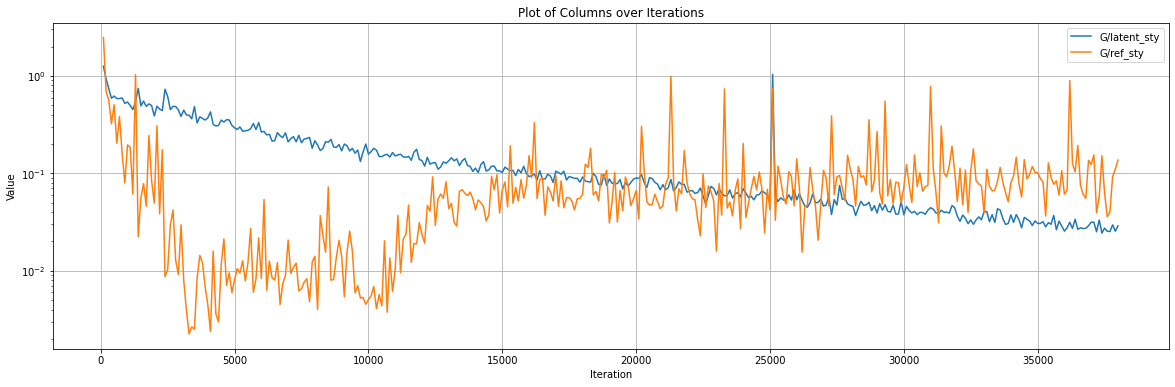

In [7]:
plot_columns(history, ['G/latent_sty', 'G/ref_sty'], logaxis=True)

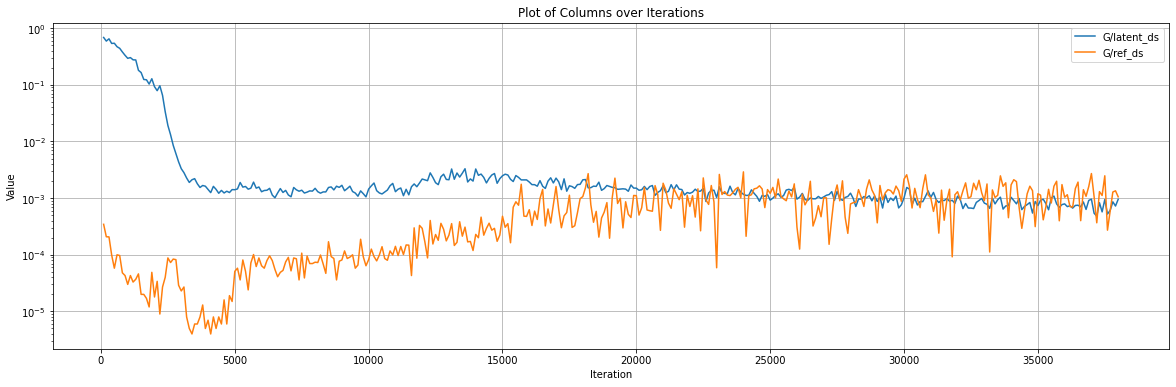

In [8]:
plot_columns(history, ['G/latent_ds', 'G/ref_ds'], logaxis=True)

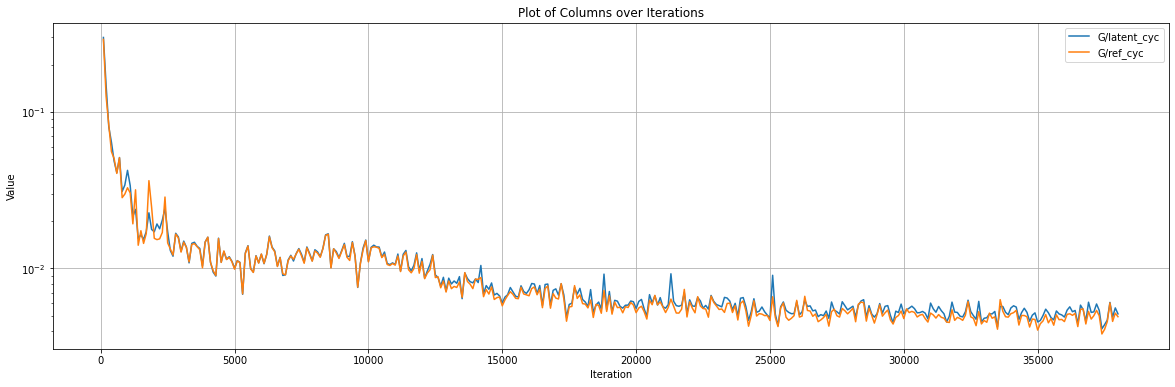

In [9]:
plot_columns(history, ['G/latent_cyc', 'G/ref_cyc'], logaxis=True)

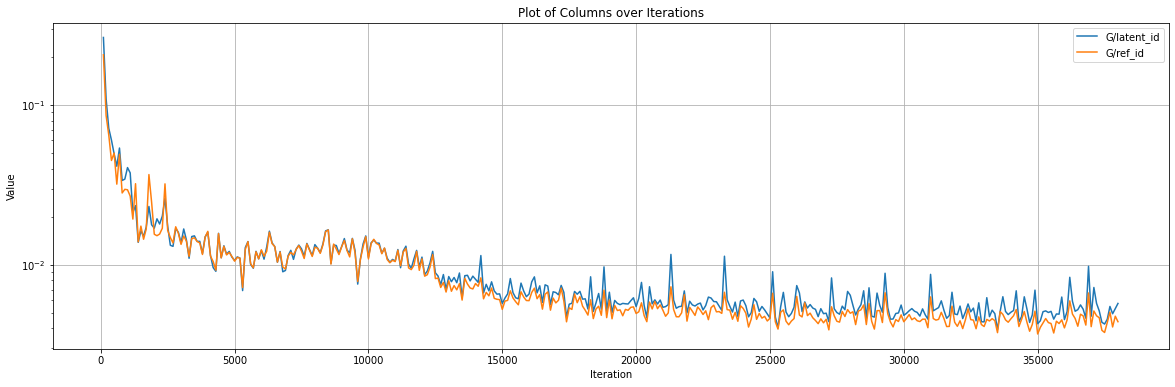

In [10]:
plot_columns(history, ['G/latent_id', 'G/ref_id'], logaxis=True)

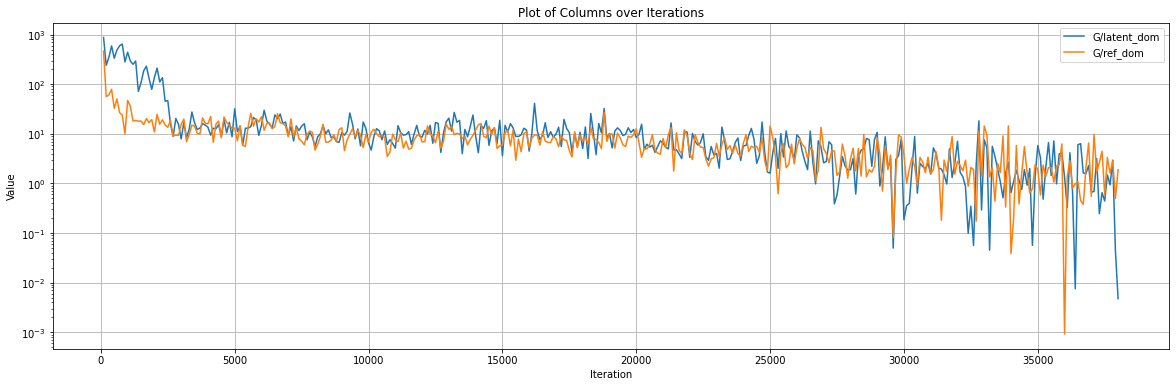

In [11]:
plot_columns(history, ['G/latent_dom', 'G/ref_dom'], logaxis=True)

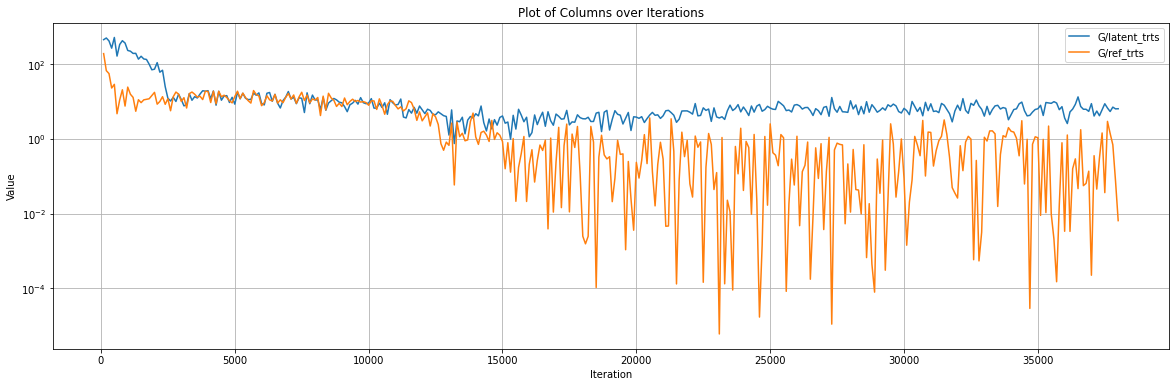

In [12]:
plot_columns(history, ['G/latent_trts', 'G/ref_trts'], logaxis=True)

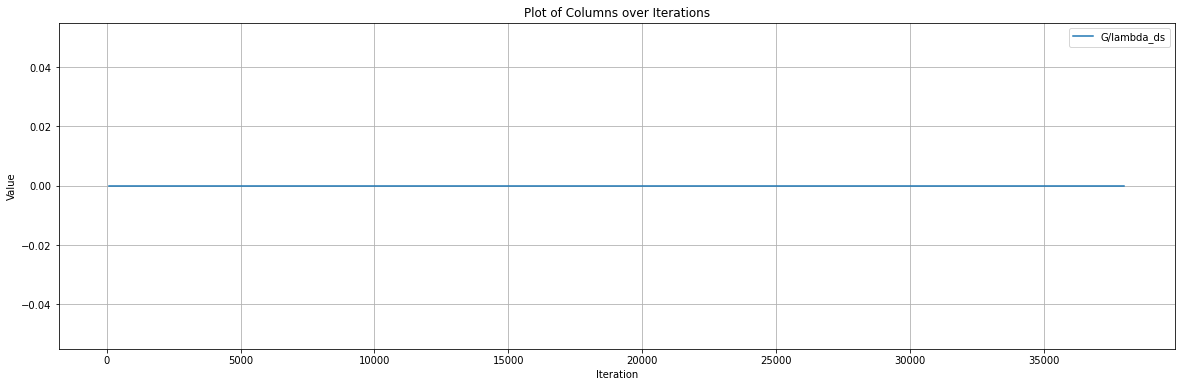

In [13]:
plot_columns(history, ['G/lambda_ds'])

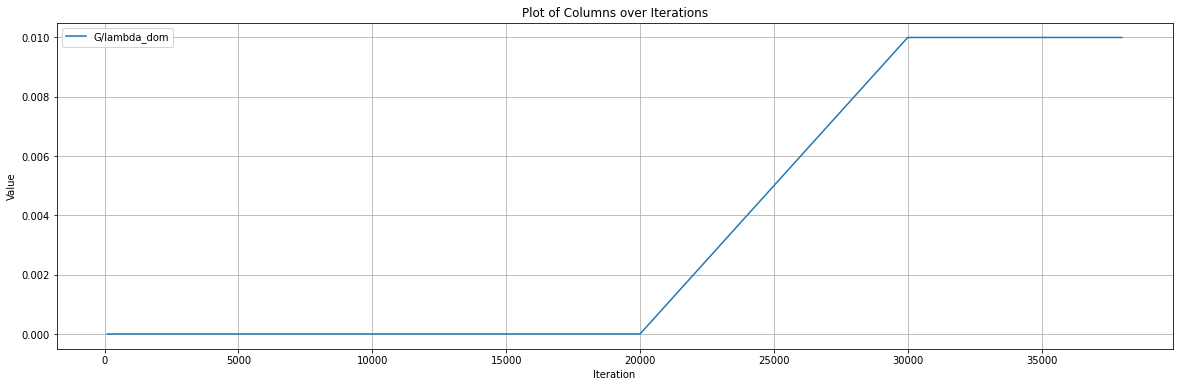

In [14]:
plot_columns(history, ['G/lambda_dom'])

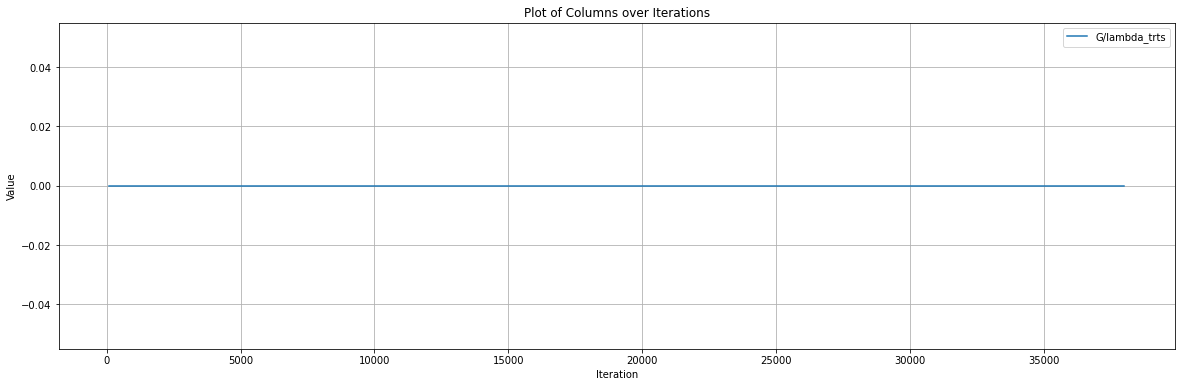

In [15]:
plot_columns(history, ['G/lambda_trts'])

# Metrics

In [16]:
file_path = 'eval/classification_scores.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,mode,source,target,domain,accuracy,loss
0,2000,latent,IR,OR_opposite,4,0.134979,3.896039
1,2000,latent,IR,OR_opposite,5,0.073491,2.543657
2,2000,latent,IR,OR_opposite,6,0.192147,4.685472
3,2000,latent,IR,OR_opposite,7,0.179003,5.189044
4,2000,latent,Ball,OR_opposite,4,0.217848,2.259794


Maximum accuracy for Ball in latent mode: 0.2635 at step 12000
Maximum accuracy for IR in latent mode: 0.4233 at step 14000
Maximum accuracy for OR_centred in latent mode: 0.3960 at step 12000
Maximum accuracy for OR_opposite in latent mode: 0.3735 at step 14000
Maximum accuracy for OR_orthogonal in latent mode: 0.4516 at step 36000


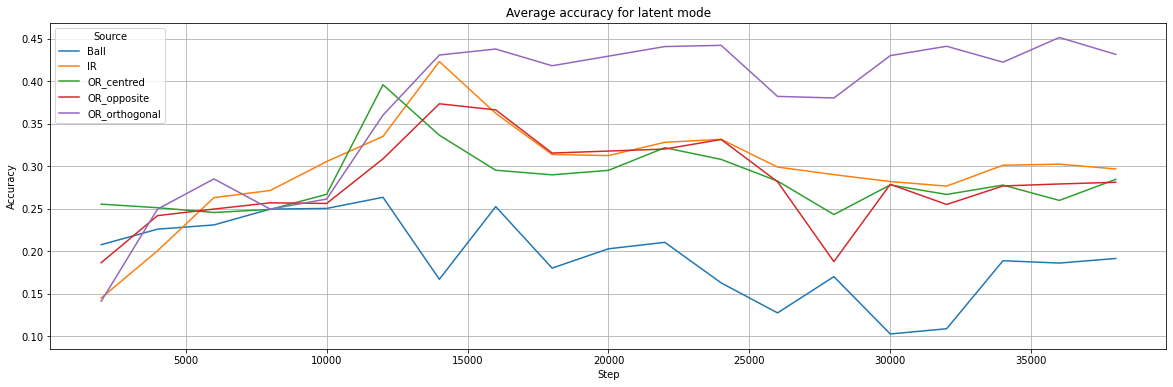

Maximum accuracy for Ball in reference mode: 0.3286 at step 2000
Maximum accuracy for IR in reference mode: 0.4917 at step 18000
Maximum accuracy for OR_centred in reference mode: 0.4198 at step 22000
Maximum accuracy for OR_opposite in reference mode: 0.4712 at step 24000
Maximum accuracy for OR_orthogonal in reference mode: 0.4695 at step 18000


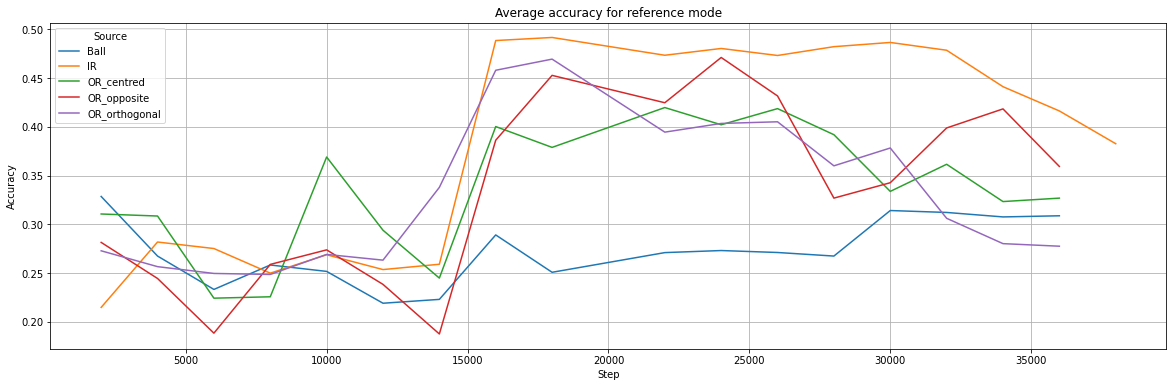

Minimum loss for Ball in latent mode: 2.5663 at step 2000
Minimum loss for IR in latent mode: 2.1068 at step 6000
Minimum loss for OR_centred in latent mode: 3.9437 at step 12000
Minimum loss for OR_opposite in latent mode: 3.9551 at step 2000
Minimum loss for OR_orthogonal in latent mode: 2.1766 at step 36000


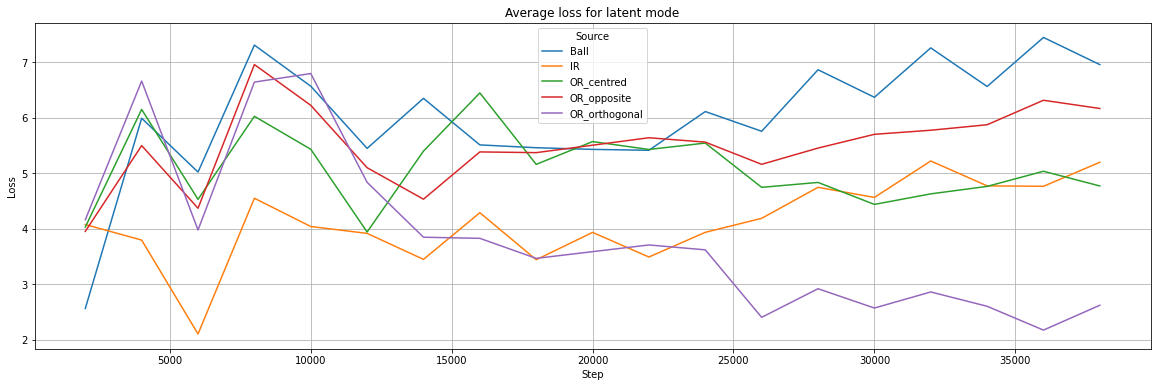

Minimum loss for Ball in reference mode: 4.6147 at step 6000
Minimum loss for IR in reference mode: 3.6819 at step 4000
Minimum loss for OR_centred in reference mode: 3.9738 at step 4000
Minimum loss for OR_opposite in reference mode: 4.4029 at step 4000
Minimum loss for OR_orthogonal in reference mode: 3.8455 at step 14000


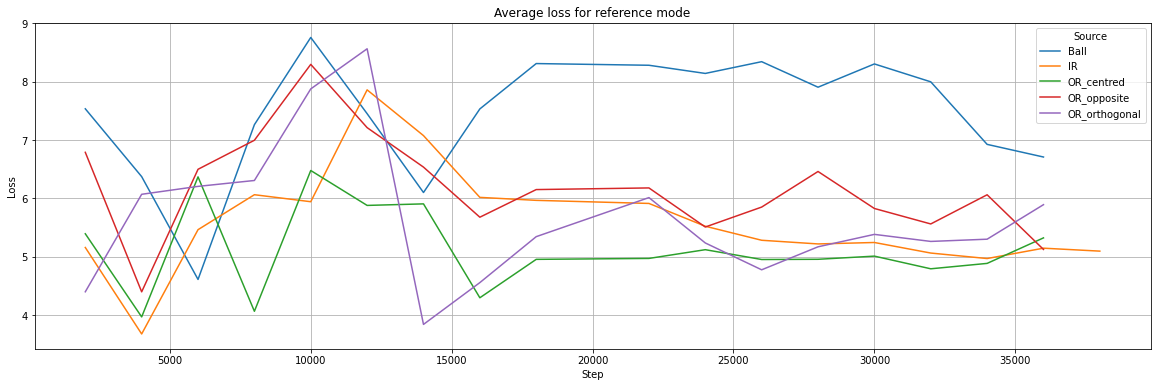

In [17]:
def plot_average_by_mode_metric(metrics, mode, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics[(metrics['mode'] == mode)]

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source} in {mode} mode: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source} in {mode} mode: {min_value:.4f} at step {min_step}')

    plt.title(f'Average {metric} for {mode} mode')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    for mode in classification_scores['mode'].unique():
        plot_average_by_mode_metric(classification_scores, mode, metric)

Maximum accuracy for Ball: 0.2708 at step 16000
Maximum accuracy for IR: 0.4254 at step 16000
Maximum accuracy for OR_centred: 0.3708 at step 22000
Maximum accuracy for OR_opposite: 0.4014 at step 24000
Maximum accuracy for OR_orthogonal: 0.4480 at step 16000


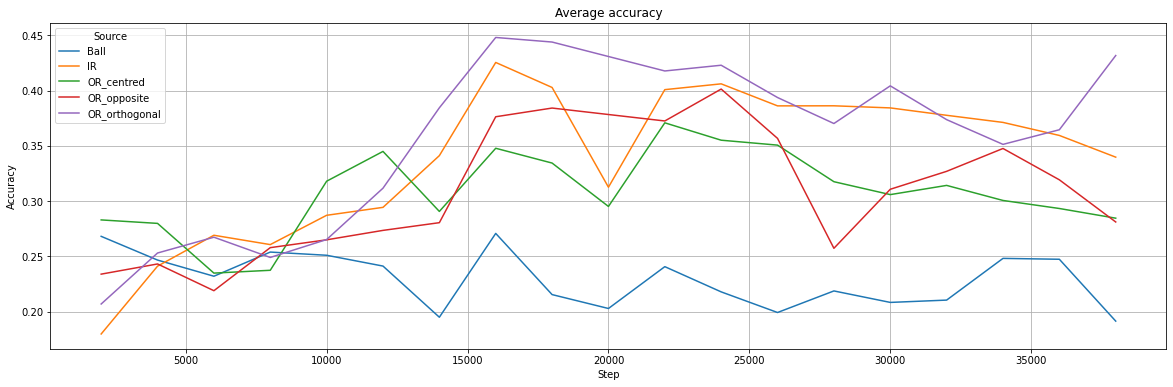

Minimum loss for Ball: 4.8194 at step 6000
Minimum loss for IR: 3.7402 at step 4000
Minimum loss for OR_centred: 4.7141 at step 32000
Minimum loss for OR_opposite: 4.9521 at step 4000
Minimum loss for OR_orthogonal: 2.6244 at step 38000


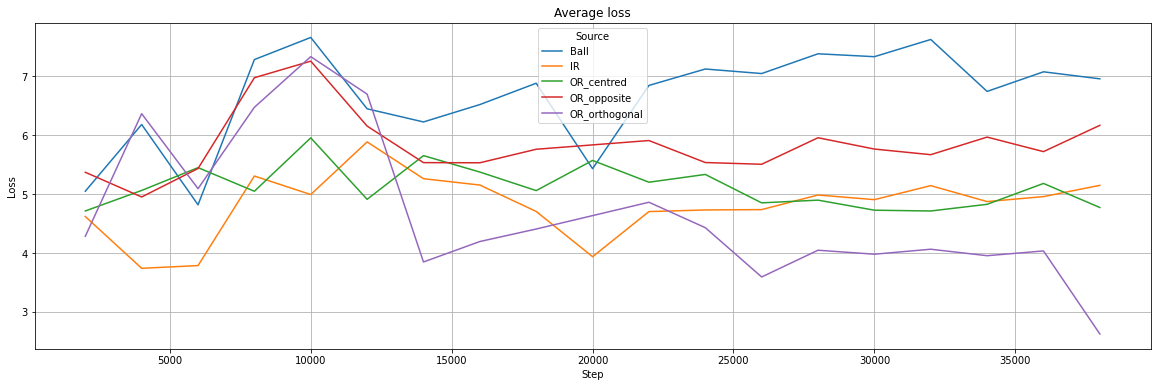

In [18]:
def plot_average_by_activity(metrics, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source}: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source}: {min_value:.4f} at step {min_step}')
            # source_data.to_csv(f'{source}_{metric}.csv', index=False)

    plt.title(f'Average {metric}')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    plot_average_by_activity(classification_scores, metric)

Max in latent mode: 0.3463 at step 14000
Max in reference mode: 0.4087 at step 18000


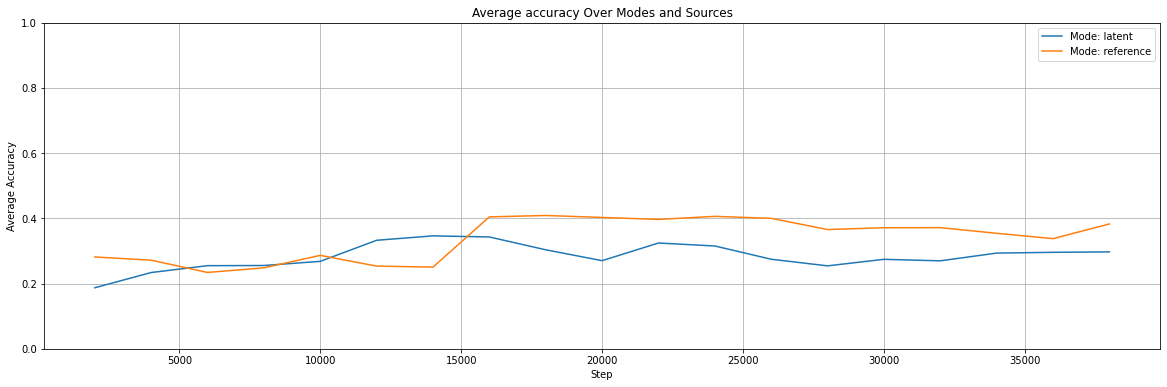

Min in latent mode: 3.7596 at step 2000
Min in reference mode: 4.9006 at step 4000


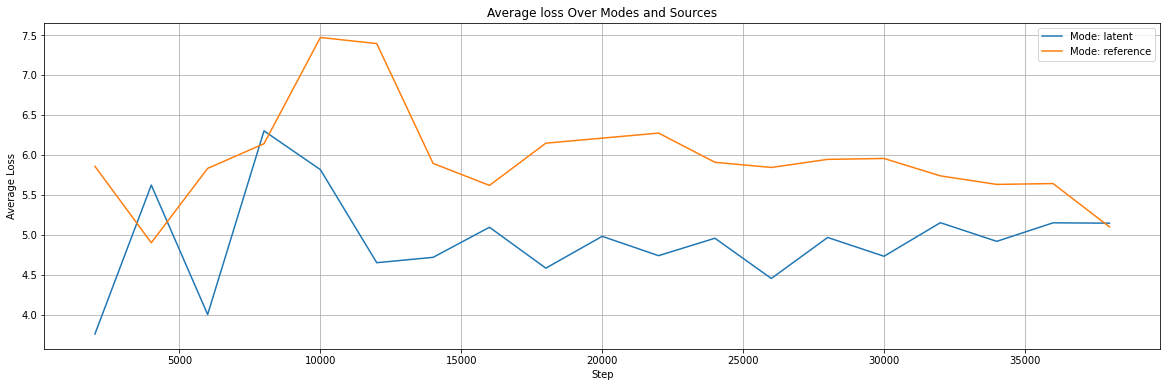

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step', 'mode']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    modes = mean_data['mode'].unique()
    for mode in modes:
        mode_data = mean_data[mean_data['mode'] == mode]
        # mode_data.to_csv(f'{mode}_{metric}.csv', index=False)
        plt.plot(mode_data['step'], mode_data[metric], label=f'Mode: {mode}')
        max_value = mode_data[metric].max()
        min_value = mode_data[metric].min()
        if metric == 'accuracy':
            step = mode_data[mode_data[metric] == max_value]['step'].values[0]
            print(f'Max in {mode} mode: {max_value:.4f} at step {step}')
        else:
            step = mode_data[mode_data[metric] == min_value]['step'].values[0]
            print(f'Min in {mode} mode: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'loss')

In [20]:
domain_scores = pd.read_csv('eval/domain_scores.csv')
domain_scores.head()

,step,mode,source,target,accuracy,loss
0,2000,latent,IR,Ball,0.243428,6.491844
1,2000,latent,IR,OR_centred,0.246583,4.150614
2,2000,latent,IR,OR_orthogonal,0.268665,3.456532
3,2000,latent,IR,OR_opposite,0.254995,5.939541
4,2000,latent,Ball,IR,0.249869,4.828308


Maximum accuracy in latent mode: 0.4009 at step 38000


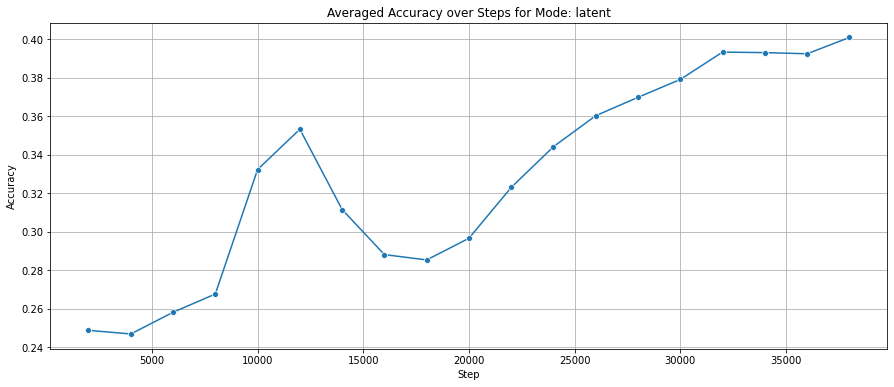

Maximum accuracy in reference mode: 0.4916 at step 38000


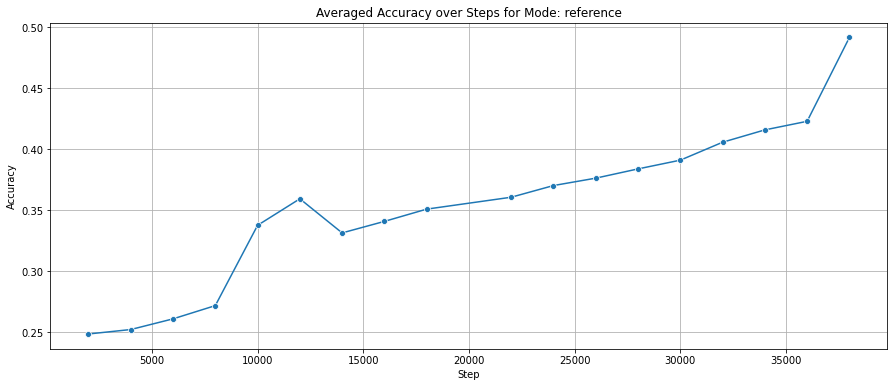

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, mode, metric):
    # Filter the DataFrame based on mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by step and calculate the mean of the metric
    averaged_data = filtered_data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps for Mode: {mode}")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



for mode in domain_scores['mode'].unique():
    plot_metric_averaged(domain_scores, mode, 'accuracy')